# Airbnb Boston/Inner Core Calendar Analysis

Here we consider a few issues:
- "Power Users" & housing implications
- Estimated Tax Revenue
- Vacancy Rates
- Comparison to global cities

For some reason the listings have duplicate room_id's. Looking at the timestamps, it appears the crawler pulled listings that overlapped in some paginated results. First, here are the variables on the dataset:

In [95]:
import pandas as pd
import numpy as np
%matplotlib inline
boston_july_listings = pd.read_csv('boston_airbnb_listings_july_2015.csv', encoding = 'ISO-8859-1')
boston_july_listings.columns

Index(['room_id', 'host_id', 'room_type', 'country', 'city', 'neighborhood',
       'address', 'reviews', 'overall_satisfaction', 'accommodates',
       'bedrooms', 'bathrooms', 'price', 'deleted', 'minstay', 'timestamp',
       'latitude', 'longitude', 'survey_i'],
      dtype='object')

##Power Users

Now let's get some basic statistics. First, let's see who's using the service the most. After removing duplicates, we aggregate count, mean, and sum on all variables, grouping by host_id. This will help us determine who the power users are:

In [91]:
boston_july_listings = boston_july_listings.drop_duplicates("room_id")
agg_multi = boston_july_listings[['room_id', 'host_id', 'room_type', 'reviews', 'overall_satisfaction', 'accommodates','bedrooms', 'bathrooms', 'price', 'minstay']]
agg_multi = agg_multi.groupby("host_id").agg(['count','mean','sum']).sort([('room_id',
    'count')], ascending=False)
agg_multi[["room_id","reviews","price"]].iloc[0:10]

room_id                            reviews                 price  \
           count            mean        sum   count       mean  sum count   
host_id                                                                     
25188        104   917685.432692   95439285     104   4.394231  457   104   
9419684       46  3914685.717391  180075543      46   3.195652  147    46   
22348222      25  6129976.920000  153249423      25   0.240000    6    25   
2356643       20  2720323.950000   54406479      20   7.300000  146    20   
7000428       18  2844484.611111   51200723      18  17.888889  322    18   
23880410      18  4803426.722222   86461681      18  20.222222  364    18   
30283594      17  6436887.352941  109427085      17   0.352941    6    17   
6331373       16  3856307.312500   61700917      16  23.687500  379    16   
1461240       16  2585077.687500   41361243      16  16.000000  256    16   
1444340       15  2912962.333333   43694435      15  20.266667  304    15   

                             
                mean    sum  
host_id                      
25188     297.288462  30918  
9419684   306.804348  14113  
22348222  147.120000   3678  
2356643   170.700000   3414  
7000428   123.055556   2215  
23880410  147.611111   2657  
30283594  540.529412   9189  
6331373    74.687500   1195  
1461240   193.812500   3101  
1444340   204.866667   3073

We can see the top ten "power users" in Boston, or those who list multiple times. Not that the aggregation method is only useful for specific columns. For example, "mean" is the only useful aggregation for price. 

Now let's get a count of how many users list two or more separate units/rooms:

In [92]:
np.divide(agg_multi[agg_multi["room_id"]["count"] > 1]["room_id"]["count"].count(), agg_multi["room_id"]["count"].count()) * 100

19.219547775346463

Almost 20% of users might be "power" users, with as many as over 100 listings under an account. 

Now let's take a look at listing types:

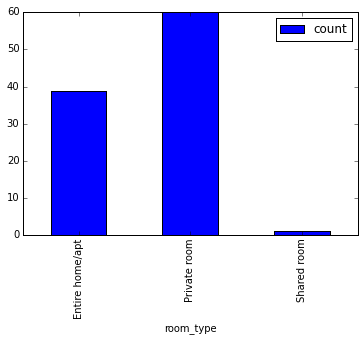

In [101]:
boston_july_listings.groupby('room_type').agg(['count'])["room_id"].apply(lambda x: 100*x/float(x.sum())).plot(kind="bar")

Wow! Nearly 40% of listings list the entire unit. I wonder if this has any relationship with our power users?

In [110]:
power_users = boston_july_listings[boston_july_listings["host_id"].isin(agg_multi[agg_multi["room_id"]["count"]> 1].index)]
np.divide(power_users.count()['room_id'], boston_july_listings.count()['room_id']) * 100

47.133048803117461

Almost half of listings are listed by "power users," or users who list more than one unit/room on the service. Let's see their room type distribution:

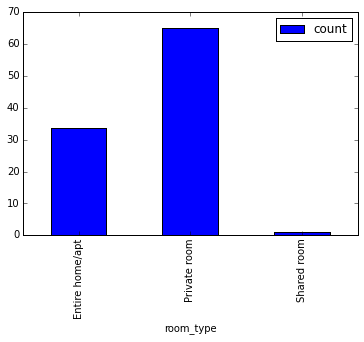

In [111]:
power_users.groupby('room_type').agg(['count'])["room_id"].apply(lambda x: 100*x/float(x.sum())).plot(kind="bar")

Interesting. Slightly fewer Power Users listings are for the entire unit - quite a lot more private rooms available. I expected the opposite. Either this is due to multiple listings for the same room, or a lot of power users are choosing to double up in their unit at certain times during the year. 

We need geographic data to compare where the user-level listings are in relation to each other.

#### Policy Implications
Often the chief concern among the Airbnb policy debate surrounds the number of full rental units that are taken off the regular rental market and used exclusively for Airbnb. However, this data suggests a scenario in which certain users who might otherwise rent regularly instead use the Airbnb service to pad income and avoid a year-round lease altogether. Further analysis would be needed.